In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

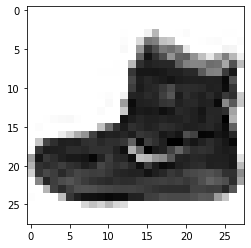

In [ ]:
plt.imshow(x_train[0],cmap=plt.cm.binary)

<Figure size 720x1080 with 0 Axes>

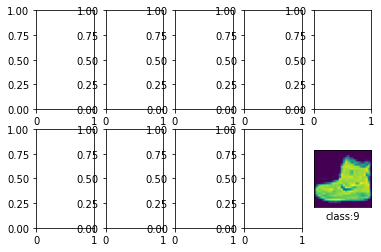

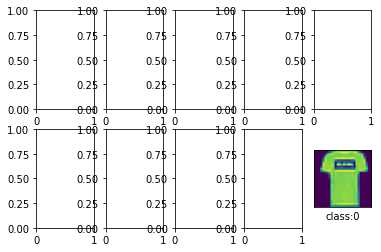

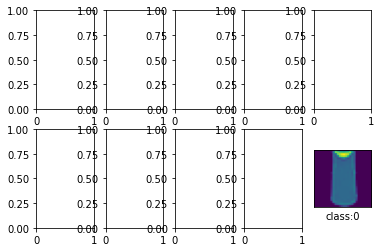

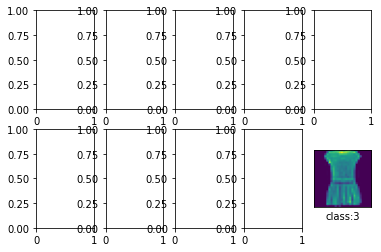

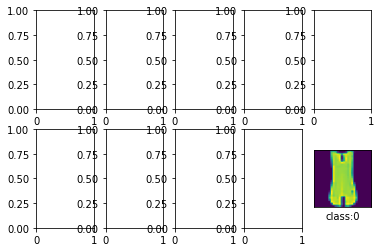

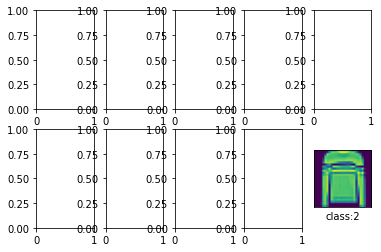

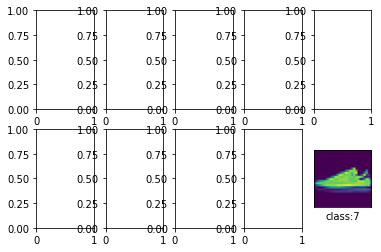

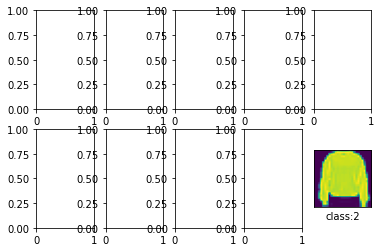

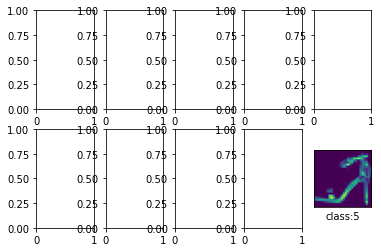

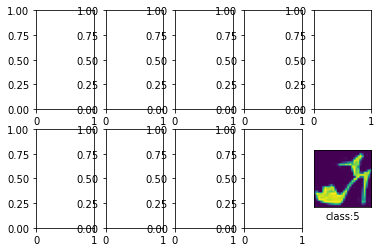

In [ ]:
plt.figure(figsize=(10,15))
for i in range(10):
  plt.subplots(nrows=2,ncols=5)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel("class:"+str(y_train[i]))
plt.show() 

In [ ]:
x_train=keras.utils.normalize(x_train,axis=1)
x_test=keras.utils.normalize(x_test,axis=1)

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

In [ ]:
model=keras.Sequential([
                        keras.layers.Dense(input_dim=x_train.shape[1],units=128,activation='relu'),
                        keras.layers.Dense(10,activation='softmax')
])

model.compile(
              optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6658 - accuracy: 0.7690
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3749 - accuracy: 0.8644
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3256 - accuracy: 0.8813
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3064 - accuracy: 0.8874
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2830 - accuracy: 0.8943


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4100 - accuracy: 0.8560


[0.4100216329097748, 0.8560000061988831]

In [ ]:
prediction=model.predict(x_test)

In [ ]:
prediction[0]

array([3.8530725e-06, 4.3397707e-12, 5.9794996e-07, 8.2884334e-08,
       7.6175493e-09, 1.6874489e-01, 9.7091106e-07, 1.0052156e-01,
       1.4657956e-04, 7.3058146e-01], dtype=float32)

In [ ]:
np.argmax(prediction[0])

9

In [ ]:
y_test[0]

9